In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", X_train.shape)  # (60000, 28, 28)
print("Test data shape:", X_test.shape)       # (10000, 28, 28)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [4]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),   # Flatten 28x28 images to 1D
    Dense(128, activation='relu'),  # Hidden layer
    Dropout(0.3),                   # Dropout for regularization
    Dense(64, activation='relu'),   # Another hidden layer
    Dense(10, activation='softmax') # Output layer for 10 classes
])

model.summary()


/Users/bhara-zstch1566/Library/Python/3.13/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # multi-class loss
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # use 20% of training data for validation
    epochs=20,
    batch_size=32
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.8946 - loss: 0.3467 - val_accuracy: 0.9540 - val_loss: 0.1512
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.9486 - loss: 0.1703 - val_accuracy: 0.9675 - val_loss: 0.1080
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.9572 - loss: 0.1342 - val_accuracy: 0.9695 - val_loss: 0.0985
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.9626 - loss: 0.1152 - val_accuracy: 0.9717 - val_loss: 0.0914
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.9684 - loss: 0.0998 - val_accuracy: 0.9748 - val_loss: 0.0876
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.9698 - loss: 0.0941 - val_accuracy: 0.9755 - val_loss: 0.0803
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.9735 - loss: 0.0833 - val_accuracy: 0.9755 - val_loss: 0.0862
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9730 -

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.9777 - loss: 0.0817
Test Accuracy: 97.77%


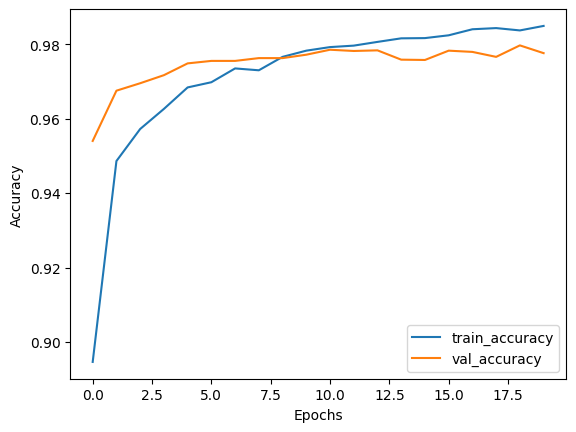

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
# Save the trained model
model.save("mnist_model.h5")
print("Model saved successfully!")


Model saved successfully!
